In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arabic-data-set/test/test/id_2005_label_23.png
/kaggle/input/arabic-data-set/test/test/id_363_label_14.png
/kaggle/input/arabic-data-set/test/test/id_42_label_21.png
/kaggle/input/arabic-data-set/test/test/id_202_label_17.png
/kaggle/input/arabic-data-set/test/test/id_1900_label_26.png
/kaggle/input/arabic-data-set/test/test/id_415_label_12.png
/kaggle/input/arabic-data-set/test/test/id_2766_label_11.png
/kaggle/input/arabic-data-set/test/test/id_1152_label_16.png
/kaggle/input/arabic-data-set/test/test/id_2125_label_27.png
/kaggle/input/arabic-data-set/test/test/id_429_label_19.png
/kaggle/input/arabic-data-set/test/test/id_2552_label_16.png
/kaggle/input/arabic-data-set/test/test/id_1922_label_9.png
/kaggle/input/arabic-data-set/test/test/id_1447_label_24.png
/kaggle/input/arabic-data-set/test/test/id_2609_label_17.png
/kaggle/input/arabic-data-set/test/test/id_1477_label_11.png
/kaggle/input/arabic-data-set/test/test/id_3084_label_2.png
/kaggle/input/arabic-data-set/te

# Pre trained model at minst dataset 

In [27]:
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

model = load_model('/kaggle/input/datasetminist/MNIST_keras_CNN.h5')
(_, _), (test_images, test_labels) = mnist.load_data()
test_images = test_images / 255.0
test_labels = to_categorical(test_labels)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.0268 - accuracy: 0.9925 - 974ms/epoch - 3ms/step

Test accuracy: 0.9925000071525574


In [47]:
train_path = '/kaggle/input/arabic-data-set/train/train/'
test_path = '/kaggle/input/arabic-data-set/test/test/'

In [48]:
# Load the pre-trained model
model = load_model('/kaggle/input/datasetminist/MNIST_keras_CNN.h5')

# Get the second-to-last layer (the existing output layer)
second_to_last_layer = model.layers[-2].output

print(second_to_last_layer)

# Remove the existing output layer

model = Model(inputs=model.input, outputs=second_to_last_layer)
print('=============================')
# Add the new output layer for 28 classes
new_output_layer = Dense(28, activation='softmax', name='output_layer')(second_to_last_layer)

new_model = Model(inputs=model.input, outputs=new_output_layer)

for layer in new_model.layers[:-1]: 
    
    layer.set_weights(model.get_layer(layer.name).get_weights())

    
new_model.summary()


KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='dropout_2/Identity:0', description="created by layer 'dropout_2'")
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv0 (Conv2D)              (None, 26, 26, 32)        320       
                                                                 
 bn0 (BatchNormalization)    (None, 26, 26, 32)        128       
                                                                 
 activation_1 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv1 (Conv2D)              (None, 24, 24, 32)        9248      
                                                                 
 bn1 (BatchNormalization)    (None, 

In [ ]:
pip install --upgrade tensorflow


In [49]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def extract_label(file_name):
    return int(file_name.split('_')[-1].split('.')[0]) - 1

train_files = os.listdir(train_path)
test_files = os.listdir(test_path)

# Extract labels from file names
train_labels = [extract_label(file) for file in train_files]
test_labels = [extract_label(file) for file in test_files]

# Create DataFrame with file names and labels
train_data = list(zip([os.path.join(train_path, file) for file in train_files], train_labels))
test_data = list(zip([os.path.join(test_path, file) for file in test_files], test_labels))

train_df = pd.DataFrame(train_data, columns=['file_path', 'label'])
test_df = pd.DataFrame(test_data, columns=['file_path', 'label'])

# Resize images to 28x28
def resize_images(file_path):
    img = Image.open(file_path)
    img = img.resize((28, 28))
    return img



train_df['resized_images'] = train_df['file_path'].apply(resize_images)
test_df['resized_images'] = test_df['file_path'].apply(resize_images)
print(sorted(train_df['label'].unique()))
print(sorted(test_df['label'].unique()))

# Convert resized images to numpy array
train_images = np.array([np.array(img) for img in train_df['resized_images']])
test_images = np.array([np.array(img) for img in test_df['resized_images']])

print(len(train_images))


# Convert labels to one-hot encoding
train_labels_one_hot = to_categorical(train_df['label'], num_classes=28)
test_labels_one_hot = to_categorical(test_df['label'], num_classes=28)
train_labels = np.array(train_labels)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
13440


# Without Augmentation

In [32]:
    
from tensorflow.keras.optimizers import Adam

for layer in new_model.layers[:1]:
    layer.trainable = False

    
new_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = new_model.fit(
    train_images, train_labels_one_hot,
    epochs=32,
    batch_size=32,
    validation_data=(test_images, test_labels_one_hot)
)
# Evaluate the model on the test set
test_loss, test_accuracy = new_model.evaluate(test_images, test_labels_one_hot)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')




Epoch 1/32
420/420 [==============================] - 5s 6ms/step - loss: 1.5787 - accuracy: 0.5181 - val_loss: 0.5906 - val_accuracy: 0.8167
Epoch 2/32
420/420 [==============================] - 2s 6ms/step - loss: 0.6376 - accuracy: 0.7924 - val_loss: 0.3543 - val_accuracy: 0.8890
Epoch 3/32
420/420 [==============================] - 2s 6ms/step - loss: 0.4431 - accuracy: 0.8533 - val_loss: 0.3509 - val_accuracy: 0.8851
Epoch 4/32
420/420 [==============================] - 2s 6ms/step - loss: 0.3463 - accuracy: 0.8834 - val_loss: 0.2634 - val_accuracy: 0.9125
Epoch 5/32
420/420 [==============================] - 2s 6ms/step - loss: 0.3009 - accuracy: 0.9022 - val_loss: 0.2554 - val_accuracy: 0.9164
Epoch 6/32
420/420 [==============================] - 2s 6ms/step - loss: 0.2580 - accuracy: 0.9140 - val_loss: 0.2361 - val_accuracy: 0.9274
Epoch 7/32
420/420 [==============================] - 2s 6ms/step - loss: 0.2232 - accuracy: 0.9265 - val_loss: 0.2206 - val_accuracy: 0.9360
Epoch 

1/1 [==============================] - 0s 20ms/step


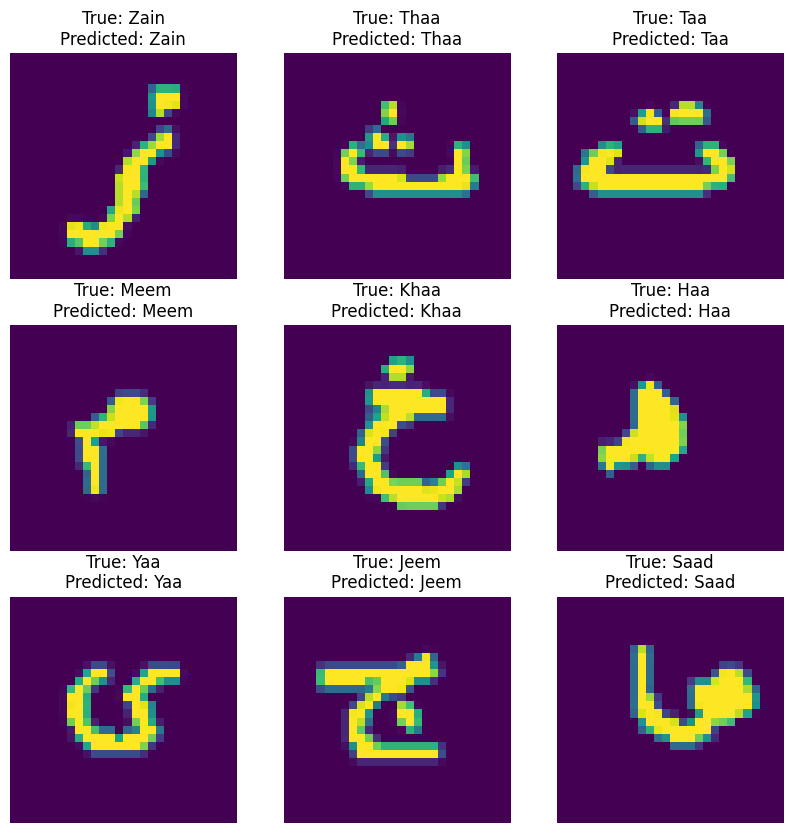

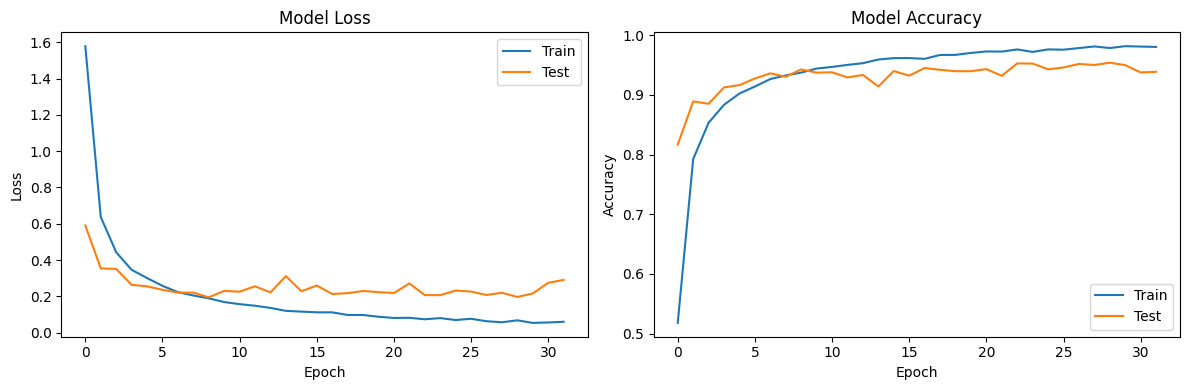

In [36]:

def label_to_letter(label):
    arabic_letters = ['Alef', 'Baa', 'Taa', 'Thaa', 'Jeem', '7aa', 'Khaa', 'Dal', 'Dhal', 'Raa', 'Zain', 'Seen', 'Sheen', 'Saad', 'Daad', 'Taa', 'Dhaa', 'Ain', 'Ghain', 'Faa', 'Qaf', 'Kaf', 'Lam', 'Meem', 'Noon', 'Haa', 'Waw', 'Yaa']
    return arabic_letters[label]

random_indices = np.random.choice(len(test_images), size=9, replace=False)

# Select 9 random images and their corresponding labels
sample_images = test_images[random_indices]
true_labels = test_labels_one_hot[random_indices]

# Predict the labels using the model
predicted_labels = new_model.predict(sample_images)

# Convert one-hot encoded labels back to integer labels
true_labels_int = np.argmax(true_labels, axis=1)
predicted_labels_int = np.argmax(predicted_labels, axis=1)

# Create a 3x3 grid for subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    # Plot the image
    ax.imshow(sample_images[i])
    ax.axis('off')

    # Display true and predicted labels
    true_label = true_labels_int[i]
    predicted_label = predicted_labels_int[i]
    title = f'True: {label_to_letter(true_label)}\nPredicted: {label_to_letter(predicted_label)}'
    ax.set_title(title)

plt.show()

plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

plt.tight_layout()
plt.show()

# After Augmentation

In [67]:
    
from tensorflow.keras.optimizers import Adam

for layer in new_model.layers[:1]:
    layer.trainable = False

    
train_images = train_images.reshape((-1, 28, 28, 1))

# Create separate instances of ImageDataGenerator for each augmentation
rotation_datagen = ImageDataGenerator(rotation_range=60)
height_shift_datagen = ImageDataGenerator(height_shift_range=0.1)
width_shift_datagen = ImageDataGenerator(width_shift_range=0.1)
zoom_datagen = ImageDataGenerator(zoom_range=0.2) 

# Apply rotation augmentation
rotation_datagen.fit(train_images)
rotated_samples = rotation_datagen.flow(train_images, train_labels_one_hot, batch_size=len(train_images), shuffle=True)
rotated_images, rotated_labels = next(rotated_samples)

# Apply height shift augmentation
height_shift_datagen.fit(train_images)
height_shift_samples = height_shift_datagen.flow(train_images, train_labels_one_hot, batch_size=len(train_images), shuffle=True)
shifted_images, shifted_labels = next(height_shift_samples)

# Apply width shift augmentation
width_shift_datagen.fit(train_images)
width_shift_samples = width_shift_datagen.flow(train_images, train_labels_one_hot, batch_size=len(train_images), shuffle=True)
shifted_width_images, shifted_width_labels = next(width_shift_samples)

# Apply zoom augmentation
zoom_datagen.fit(train_images)
zoom_samples = zoom_datagen.flow(train_images, train_labels_one_hot, batch_size=len(train_images), shuffle=True)
zoomed_images, zoomed_labels = next(zoom_samples)

# Concatenate the original and augmented data
new_train_images = np.concatenate([train_images, rotated_images, shifted_images, shifted_width_images, zoomed_images])
new_train_labels_one_hot = np.concatenate([train_labels_one_hot, rotated_labels, shifted_labels, shifted_width_labels, zoomed_labels])


new_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = new_model.fit(
    new_train_images, new_train_labels_one_hot,
    epochs=20,
    batch_size=128,
    validation_data=(test_images, test_labels_one_hot)
)
# Evaluate the model on the test set
test_loss, test_accuracy = new_model.evaluate(test_images, test_labels_one_hot)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')




Epoch 1/20


2024-01-31 17:49:15.095387: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_7/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


525/525 [==============================] - 9s 11ms/step - loss: 0.1066 - accuracy: 0.9716 - val_loss: 0.2120 - val_accuracy: 0.9649
Epoch 2/20
525/525 [==============================] - 5s 10ms/step - loss: 0.0932 - accuracy: 0.9739 - val_loss: 0.2046 - val_accuracy: 0.9637
Epoch 3/20
525/525 [==============================] - 5s 10ms/step - loss: 0.0842 - accuracy: 0.9758 - val_loss: 0.2014 - val_accuracy: 0.9658
Epoch 4/20
525/525 [==============================] - 5s 10ms/step - loss: 0.0818 - accuracy: 0.9764 - val_loss: 0.1956 - val_accuracy: 0.9673
Epoch 5/20
525/525 [==============================] - 5s 10ms/step - loss: 0.0788 - accuracy: 0.9771 - val_loss: 0.1908 - val_accuracy: 0.9658
Epoch 6/20
525/525 [==============================] - 5s 10ms/step - loss: 0.0741 - accuracy: 0.9782 - val_loss: 0.1899 - val_accuracy: 0.9646
Epoch 7/20
525/525 [==============================] - 5s 10ms/step - loss: 0.0713 - accuracy: 0.9781 - val_loss: 0.1896 - val_accuracy: 0.9658
Epoch 8/20

1/1 [==============================] - 0s 21ms/step


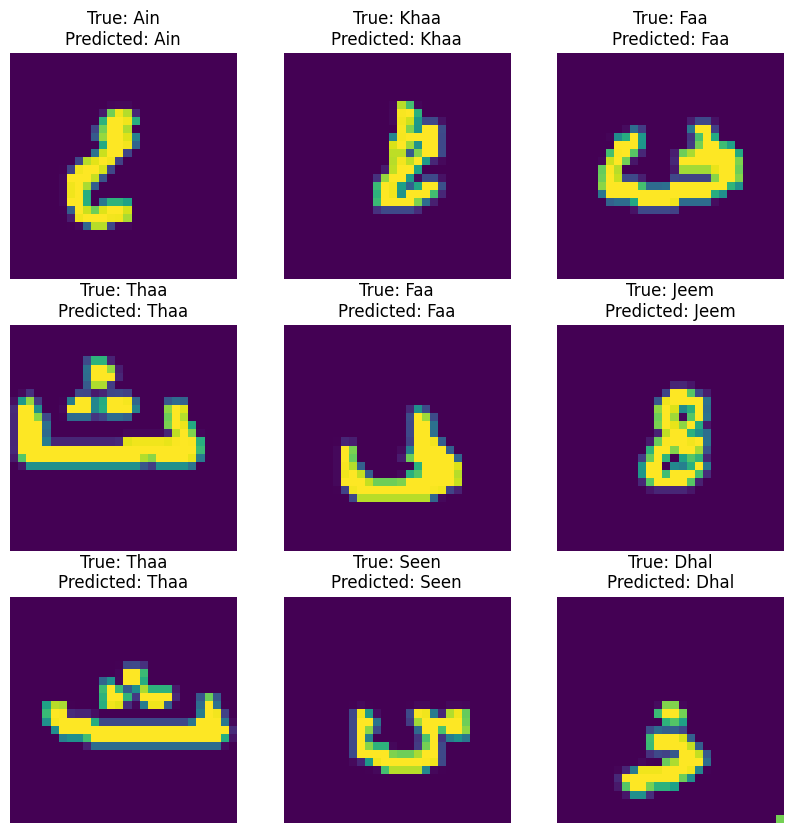

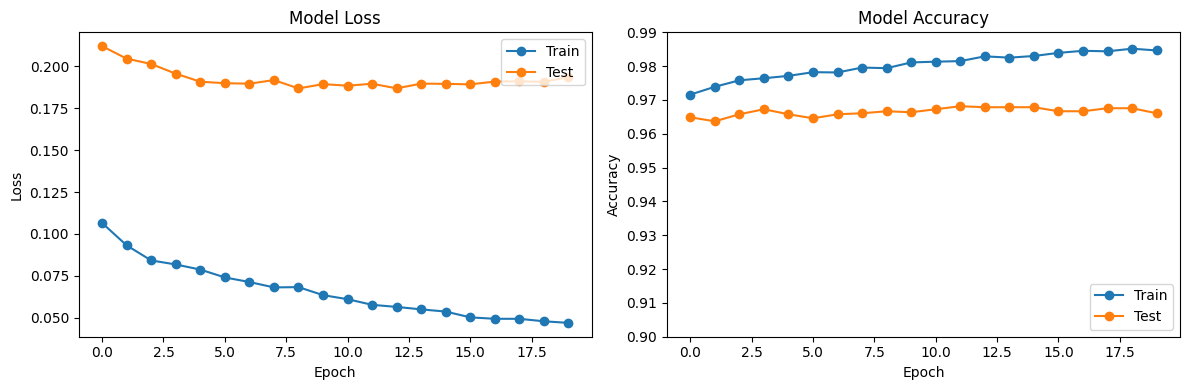

In [82]:

def label_to_letter(label):
    arabic_letters = ['Alef', 'Baa', 'Taa', 'Thaa', 'Jeem', '7aa', 'Khaa', 'Dal', 'Dhal', 'Raa', 'Zain', 'Seen', 'Sheen', 'Saad', 'Daad', 'Taa', 'Dhaa', 'Ain', 'Ghain', 'Faa', 'Qaf', 'Kaf', 'Lam', 'Meem', 'Noon', 'Haa', 'Waw', 'Yaa']
    return arabic_letters[label]

random_indices = np.random.choice(len(test_images), size=9, replace=False)

# Select 9 random images and their corresponding labels
sample_images = test_images[random_indices]
true_labels = test_labels_one_hot[random_indices]

# Predict the labels using the model
predicted_labels = new_model.predict(sample_images)

# Convert one-hot encoded labels back to integer labels
true_labels_int = np.argmax(true_labels, axis=1)
predicted_labels_int = np.argmax(predicted_labels, axis=1)

# Create a 3x3 grid for subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    # Plot the image
    ax.imshow(sample_images[i])
    ax.axis('off')

    # Display true and predicted labels
    true_label = true_labels_int[i]
    predicted_label = predicted_labels_int[i]
    title = f'True: {label_to_letter(true_label)}\nPredicted: {label_to_letter(predicted_label)}'
    ax.set_title(title)

plt.show()
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'],marker='o')
plt.plot(history.history['val_loss'],marker='o')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')


# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'],marker='o')
plt.plot(history.history['val_accuracy'],marker='o')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

plt.yticks(np.arange(0.9, 1.0, 0.01))

plt.tight_layout()
plt.show()